In [1]:
import os
os.chdir('..')


In [2]:

import nmrglue as ng
import numpy as np
from cops_analysis import cops_analyze
from cops_prediction import gaussian, int_seq_match, print_probabilities
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralBiclustering

In [3]:
%%time
b = cops_analyze(['./SHP2_Gradcops/SHP2_Grad1.ft3',
                  './SHP2_Gradcops/SHP2_Grad3.ft3',
                  './SHP2_Gradcops/SHP2_Grad5.ft3',
                  './SHP2_Gradcops/SHP2_Grad6.ft3'],
                 mode='HNCA', cop_num=[1,2,4,5], pyruvate_on=False)

#removed index 342: CA way too low!
tb = pd.read_csv('./dev/SHP2_processed.csv', sep='\t')
tb = tb.rename(columns={'w1':'HN','w2':'CA','w3':'N'})
tb = tb.drop([342])
tb = tb.reset_index()

#realign spectra
shifts_array = tb[['CA', 'N','HN']].to_numpy(dtype=np.float32)
shifts_array[:,[0,1]]=shifts_array[:,[1,0]]



CPU times: user 10.2 s, sys: 7.46 s, total: 17.7 s
Wall time: 17.7 s


In [4]:
%%time
prediction = []
error = []
CB = []
for i in shifts_array:
    try:
        out = print_probabilities(b, i[1], i, True, False, tms_shift=3.12)
        prediction.append(out[0].astype(str).to_numpy())
        error.append(out[2])
        CB.append(out[1])
    except:
        prediction.append("invalid or glycine peak selection.")
        error.append(0)
        CB.append(0)

26.773682216039305

 peak shifts: [129.36499  48.55583   7.60125]
predicted Cb: 20.22ppm
209.62308265214793

 peak shifts: [127.61668  57.50206   7.35108]
predicted Cb: 23.39ppm
112.43489468919488

 peak shifts: [124.96531  57.57096   7.10819]
predicted Cb: 35.53ppm
223.67506254752925

 peak shifts: [124.82412  63.28477   7.05406]
predicted Cb: 11.42ppm
151.51217194734878

 peak shifts: [123.71404  52.88781   7.1818 ]
predicted Cb: 25.29ppm
294.7075456443784

 peak shifts: [124.7177   52.66874   7.25808]
predicted Cb: 10.13ppm
522.0196324701891

 peak shifts: [124.3973   51.8212    7.28145]
predicted Cb: 10.71ppm
248.99010918950896

 peak shifts: [123.28444  55.85202   6.92015]
predicted Cb: 23.41ppm
286.25172903989744

 peak shifts: [126.17585  52.06431   6.16323]
predicted Cb: 36.84ppm
170.88409360340745

 peak shifts: [118.6784   50.82346   6.25353]
predicted Cb: 27.44ppm
167.52804278404062

 peak shifts: [116.81376  49.76423   6.60254]
predicted Cb: 26.74ppm
417.2036219805648

 pea

In [6]:
tb['Type prediction'] = prediction
tb['CB prediction error'] = error
tb['predicted CB'] = CB

TypeError: unsupported operand type(s) for /: 'int' and 'list'

IndexError: tuple index out of range

In [7]:
#a = int_seq_match(b, cops_mode='HNCA')
a = int_seq_match(b, peak_table_dir = tb, cops_mode='HNCA')

1714
[131.79533  58.76523   8.39841]
CPU times: user 59.2 ms, sys: 4.22 ms, total: 63.4 ms
Wall time: 92.8 ms


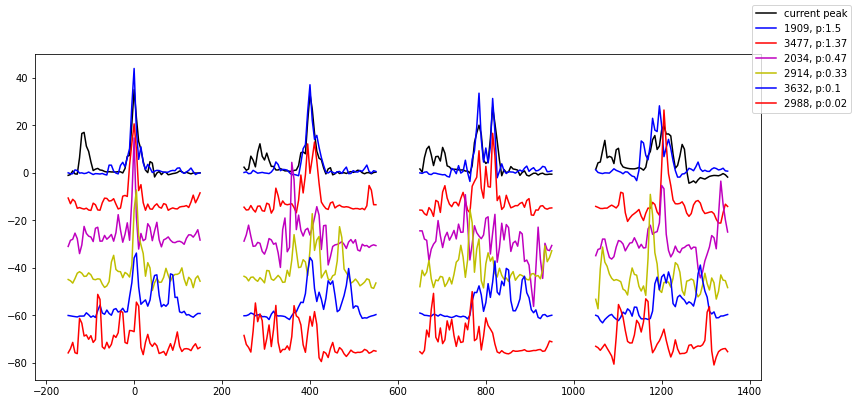

In [8]:
%%time
index = 14
print(tb['Assignment'][index])
print(shifts_array[index])
df, fig = a.find_best_matches(shifts_array[index], snr=25,gen_plot=True, verbose=False, sequential_mode=True)

In [9]:
df['peak']=df['peak'].astype(str)
print(df.to_numpy())

[['1909' 1.5]
 ['3477' 1.37]
 ['2034' 0.47]
 ['2914' 0.33]
 ['3632' 0.1]
 ['2988' 0.02]]


In [11]:
%%time
prediction = []
for ind, row in tb[~tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=True)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no sequential peak within CA range."])
        pass

tb.loc[~tb['is_sequential'], 'prediction'] = prediction

CPU times: user 909 ms, sys: 7.78 ms, total: 917 ms
Wall time: 925 ms


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [12]:
%%time
prediction = []
for ind, row in tb[tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=False)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no internal peak within CA range."])
        pass

tb.loc[tb['is_sequential'], 'prediction'] = prediction

CPU times: user 872 ms, sys: 11.7 ms, total: 883 ms
Wall time: 885 ms


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [13]:
tb['prediction'] = tb['prediction'].astype(str)
tb['Type prediction'] = tb['Type prediction'].astype(str)
func = lambda e: e['prediction'].replace('\n', ',')
func2 = lambda e: e['prediction'].replace('\'', '')
func3 = lambda e: e['Type prediction'].replace('\n', ',')
func4 = lambda e: e['Type prediction'].replace('\'', '')
tb['prediction'] = tb.apply(func, axis=1)
tb['prediction'] = tb.apply(func2, axis=1) 
tb['Type prediction'] = tb.apply(func3, axis=1)
tb['Type prediction'] = tb.apply(func4, axis=1)
#tb.to_csv('./dev/shp2_plots/shp2_predictions.csv',sep='\t')

In [17]:
tb.to_csv('./dev/shp2_plots/shp2_predictions_allcops.csv',sep='\t')

In [16]:
tb['CB prediction error'] = 1/tb['CB prediction error']